In [1]:
import pandas as pd
df = pd.read_csv('C:\\Users\\NIKHIL\\OneDrive\\Documents\\ONE\\OneDrive\\Desktop\\PORTFOLIO\\PROJECT_1\\Online Retail Data Set.csv', encoding='latin1')


In [2]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


array([[<Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'UnitPrice'}>],
       [<Axes: title={'center': 'CustomerID'}>, <Axes: >]], dtype=object)

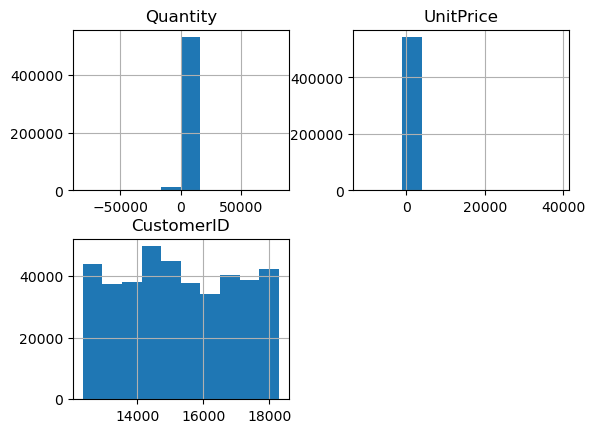

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
df.hist()


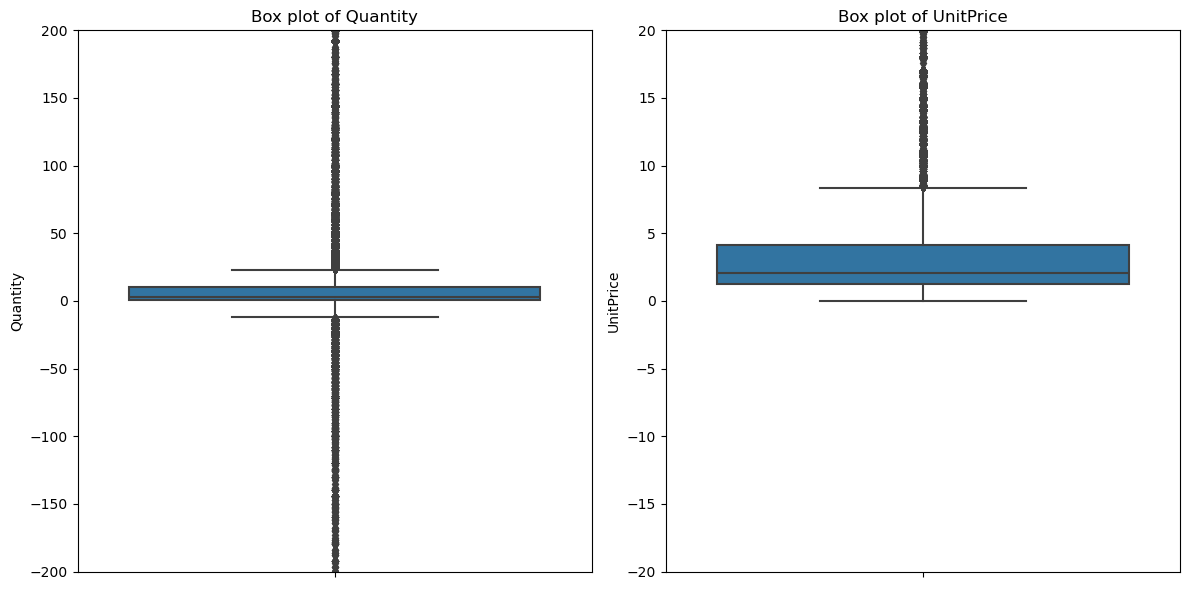

In [6]:
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
sns.boxplot(y = df['Quantity'])
plt.title('Box plot of Quantity')
plt.ylabel('Quantity')
plt.ylim(-200,200)


plt.subplot(1,2,2)
sns.boxplot(y = df['UnitPrice'])
plt.title('Box plot of UnitPrice')
plt.ylim(-20,20)

plt.tight_layout()
plt.show()

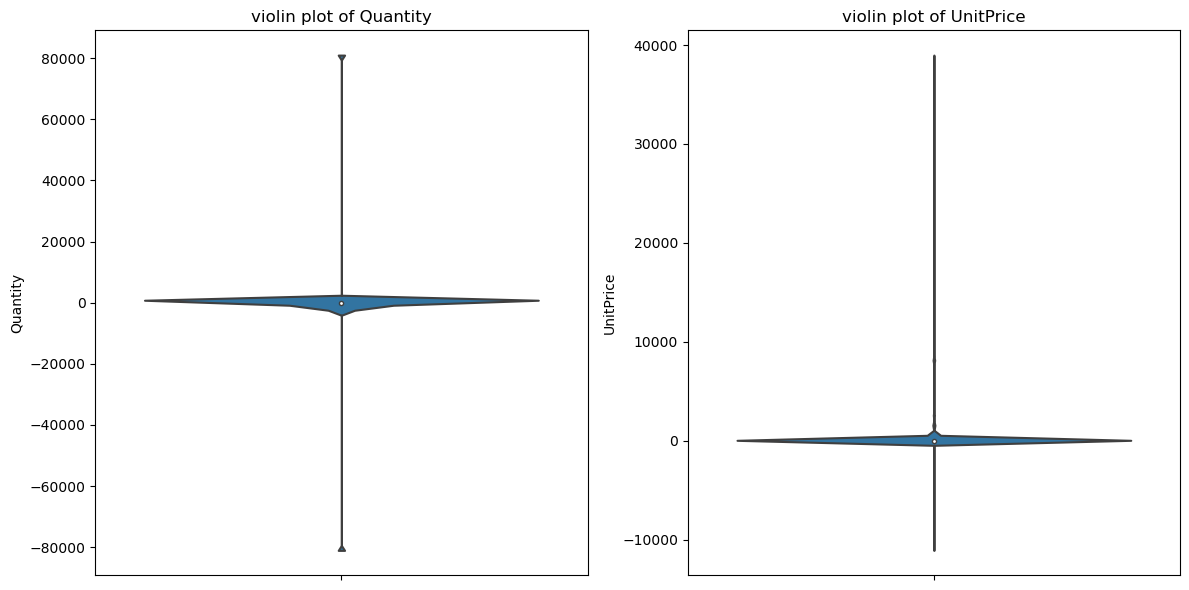

In [7]:
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
sns.violinplot(y = df['Quantity'])
plt.title('violin plot of Quantity')
plt.ylabel('Quantity')
#plt.ylim(-200,200)


plt.subplot(1,2,2)
sns.violinplot(y = df['UnitPrice'])
plt.title('violin plot of UnitPrice')
#plt.ylim(-20,20)

plt.tight_layout()
plt.show()

In [8]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],format = '%d-%m-%Y %H:%M')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [9]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [10]:
df_sales = df[df['Quantity']> 0].copy()
df_returns = df[df['Quantity']< 0].copy()
print(f'Original shape of the DataFrame = {df.shape}')
print(f'Original shape of the Sales DataFrame = {df_sales.shape}')
print(f'Original shape of the Returns DataFrame = {df_returns.shape}')

Original shape of the DataFrame = (541909, 8)
Original shape of the Sales DataFrame = (531285, 8)
Original shape of the Returns DataFrame = (10624, 8)


In [11]:
Neg_unitprice_sales = df_sales[df_sales['UnitPrice'] < 0].shape[0]
zero_unitprice_sales = df_sales[df_sales['UnitPrice'] == 0].shape[0]
print(f'Number of sales with unitprice Negetive = {Neg_unitprice_sales}')
print(f'Number of sales with unitprice zero = {zero_unitprice_sales}')

Number of sales with unitprice Negetive = 2
Number of sales with unitprice zero = 1179


In [12]:
df_sales = df_sales[df_sales['UnitPrice'] > 0].copy()
df_sales.shape[0]

530104

In [13]:
Non_positive_rows = df_returns[df_returns['UnitPrice'] <= 0 ].shape[0]
print(f'Number of rows with 0, Negative Unitprice in returns dataframe: {Non_positive_rows }')

Number of rows with 0, Negative Unitprice in returns dataframe: 1336


In [14]:
df_returns = df_returns[df_returns['UnitPrice'] > 0].copy()

In [15]:
df_returns.shape[0]

9288

In [16]:
df['Description'].isnull().sum()
#in original df

1454

In [17]:
df['CustomerID'].isnull().sum()

135080

In [18]:
df_sales.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132220
Country             0
dtype: int64

In [19]:
df_returns.isnull().sum()

InvoiceNo        0
StockCode        0
Description      0
Quantity         0
InvoiceDate      0
UnitPrice        0
CustomerID     383
Country          0
dtype: int64

In [20]:
print(f'before dropping:{df_sales.shape[0]}')
df_sales.dropna(subset = 'CustomerID', inplace = True)
print(f'after dropping: {df_sales.shape[0]}')

before dropping:530104
after dropping: 397884


In [21]:
df_sales['CustomerID'] = df_sales['CustomerID'].astype(int)
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  int32         
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 25.8+ MB


In [22]:
df_sales['Revenue'] = df_sales['Quantity'] * df_sales['UnitPrice']
df_sales.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Revenue'],
      dtype='object')

In [23]:
df_sales.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [24]:
df_sales.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,Revenue
count,397884.000000,397884,397884.000000,397884.000000,397884.000000
mean,12.988238,2011-07-10 23:41:23.511023360,3.116488,15294.423453,22.397000
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000,0.001000
25%,2.000000,2011-04-07 11:12:00,1.250000,13969.000000,4.680000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000,11.800000
75%,12.000000,2011-10-20 14:33:00,3.750000,16795.000000,19.800000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000,168469.600000
std,179.331775,NaN,22.097877,1713.141560,309.071041


In [25]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  int32         
 7   Country      397884 non-null  object        
 8   Revenue      397884 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(4)
memory usage: 28.8+ MB


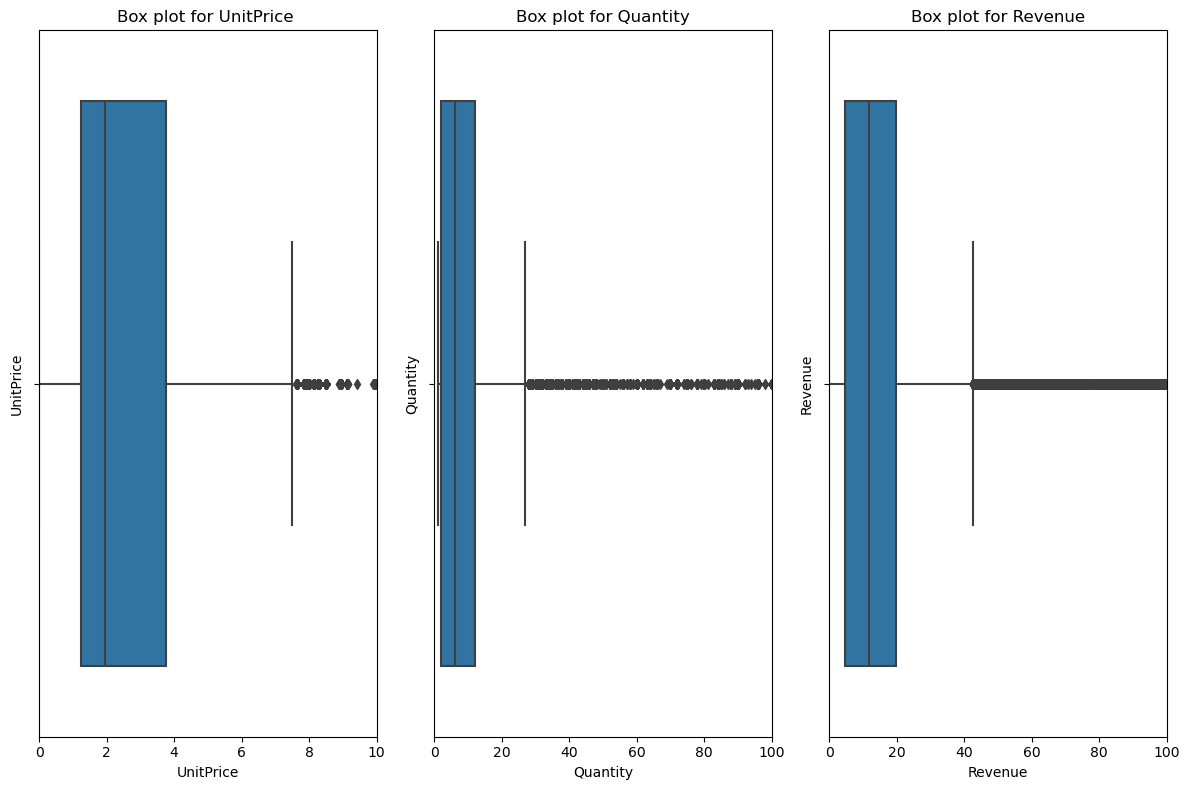

In [26]:
plt.figure(figsize = (12,8))
plt.subplot(1,3,1)
sns.boxplot(df_sales, x ='UnitPrice')
plt.title('Box plot for UnitPrice ')
plt.ylabel('UnitPrice')
plt.xlim(0,10)

plt.subplot(1,3,2)
sns.boxplot(df_sales, x ='Quantity')
plt.title('Box plot for Quantity')
plt.ylabel('Quantity')
plt.xlim(0,100)

plt.subplot(1,3,3)
sns.boxplot(df_sales, x ='Revenue')
plt.title('Box plot for Revenue')
plt.ylabel('Revenue')
plt.xlim(0,100)

plt.tight_layout()
plt.show()

C:\Users\NIKHIL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\NIKHIL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\NIKHIL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


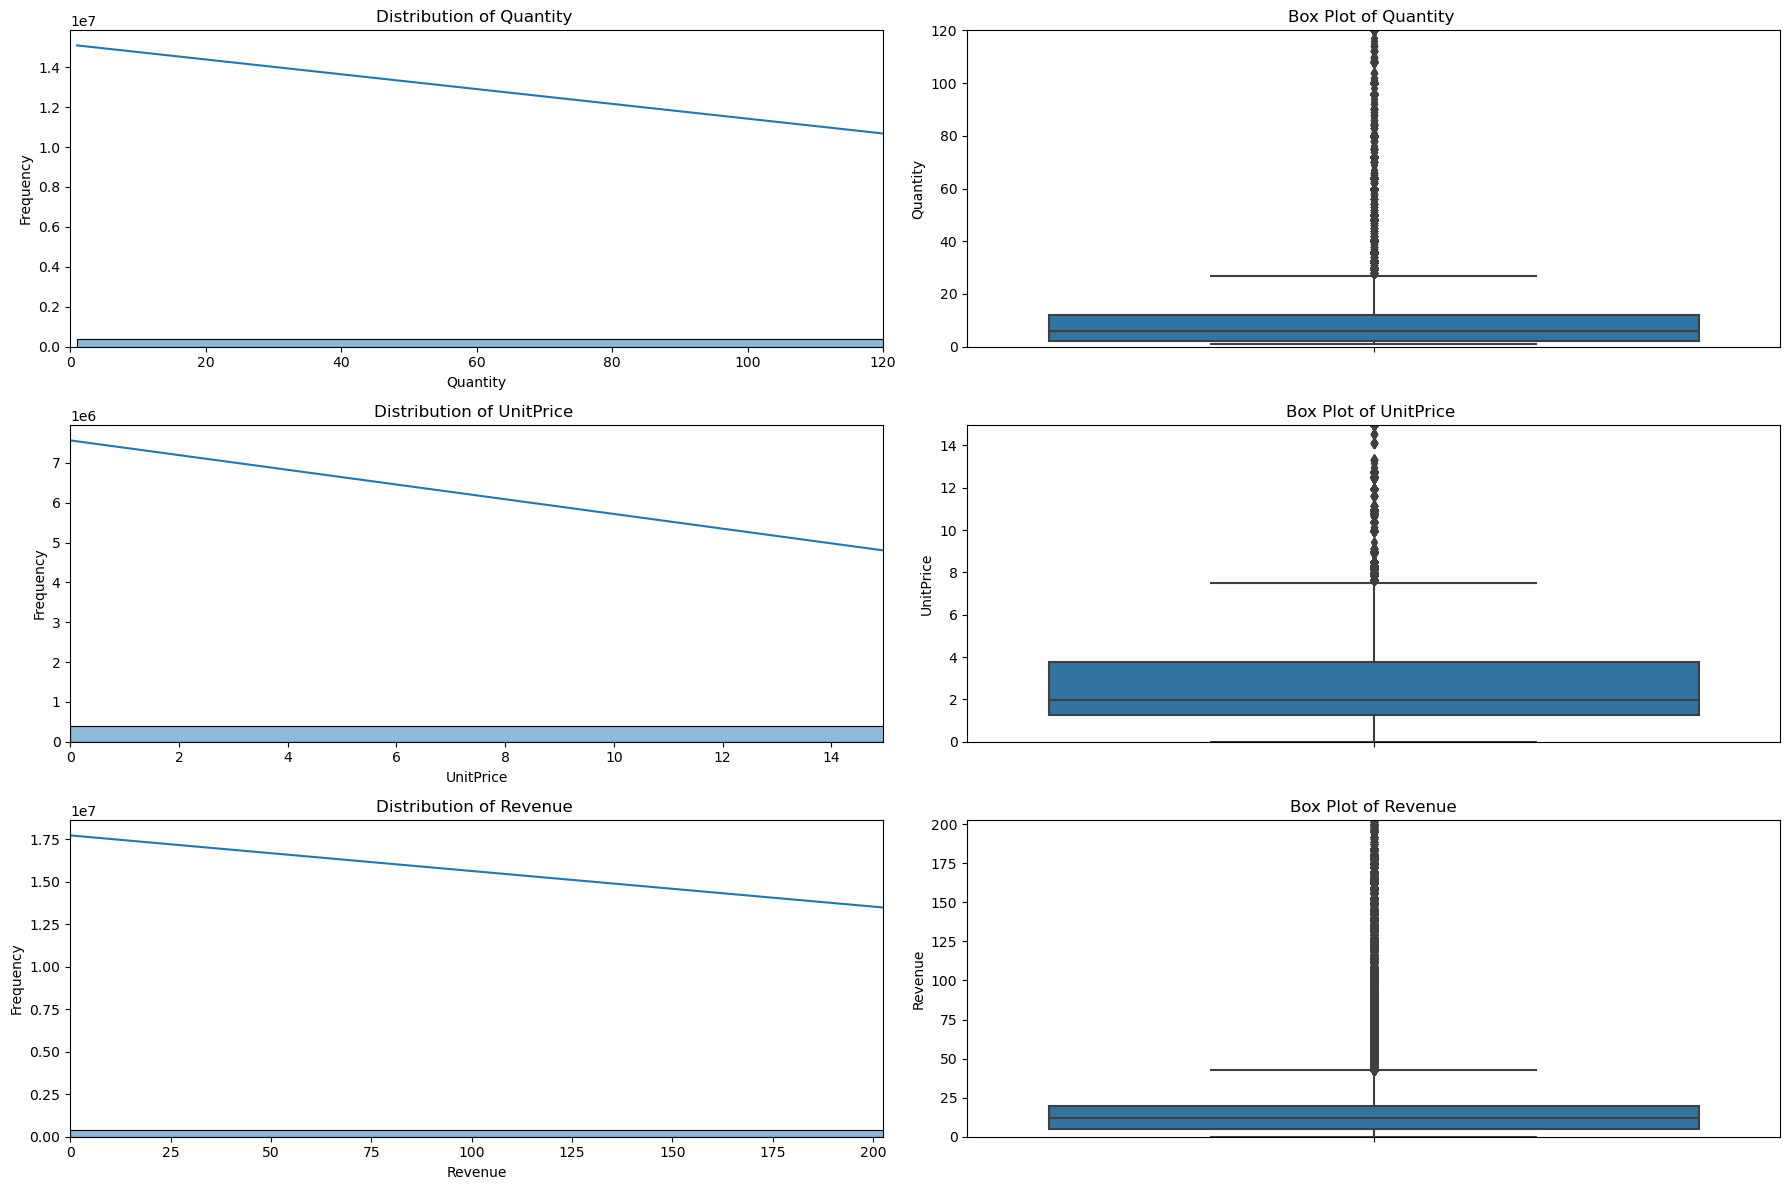

In [27]:
plt.figure(figsize=(18, 12))

plt.subplot(3, 2, 1) 
sns.histplot(df_sales['Quantity'], bins=50, kde=True)
plt.title('Distribution of Quantity ')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.xlim(0, df_sales['Quantity'].quantile(0.99)) 

plt.subplot(3, 2, 2) 
sns.boxplot(y=df_sales['Quantity'])
plt.title('Box Plot of Quantity ')
plt.ylabel('Quantity')
plt.ylim(0, df_sales['Quantity'].quantile(0.99))


plt.subplot(3, 2, 3) 
sns.histplot(df_sales['UnitPrice'], bins=50, kde=True)
plt.title('Distribution of UnitPrice ')
plt.xlabel('UnitPrice')
plt.ylabel('Frequency')
plt.xlim(0, df_sales['UnitPrice'].quantile(0.99)) 

plt.subplot(3, 2, 4) 
sns.boxplot(y=df_sales['UnitPrice'])
plt.title('Box Plot of UnitPrice ')
plt.ylabel('UnitPrice')
plt.ylim(0, df_sales['UnitPrice'].quantile(0.99))


plt.subplot(3, 2, 5) 
sns.histplot(df_sales['Revenue'], bins=50, kde=True)
plt.title('Distribution of Revenue ')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.xlim(0, df_sales['Revenue'].quantile(0.99)) 

plt.subplot(3, 2, 6) 
sns.boxplot(y= df_sales['Revenue'])
plt.title('Box Plot of Revenue')
plt.ylabel('Revenue')
plt.ylim(0, df_sales['Revenue'].quantile(0.99))

plt.tight_layout()
plt.show()

In [28]:
most_recent_transaction_date = df_sales['InvoiceDate'].max()
print(f'most_recent_transaction_date is: {most_recent_transaction_date}')
snapshot_date = df_sales['InvoiceDate'].max() + pd.Timedelta(days = 1)
print(f'snapshotdate for recency: {snapshot_date}')

most_recent_transaction_date is: 2011-12-09 12:50:00
snapshotdate for recency: 2011-12-10 12:50:00


In [29]:
rfm_df = df_sales.groupby('CustomerID').agg(lastpurchasedate = ('InvoiceDate','max'),frequency = ('InvoiceNo','nunique'),monetory = ('Revenue','sum')).reset_index()

In [30]:
rfm_df.head()

,CustomerID,lastpurchasedate,frequency,monetory
0,12346,2011-01-18 10:01:00,1,77183.60
1,12347,2011-12-07 15:52:00,7,4310.00
2,12348,2011-09-25 13:13:00,4,1797.24
3,12349,2011-11-21 09:51:00,1,1757.55
4,12350,2011-02-02 16:01:00,1,334.40


In [31]:
rfm_df['recency'] = (snapshot_date - rfm_df['lastpurchasedate']).dt.days
rfm_df.head()

,CustomerID,lastpurchasedate,frequency,monetory,recency
0,12346,2011-01-18 10:01:00,1,77183.60,326
1,12347,2011-12-07 15:52:00,7,4310.00,2
2,12348,2011-09-25 13:13:00,4,1797.24,75
3,12349,2011-11-21 09:51:00,1,1757.55,19
4,12350,2011-02-02 16:01:00,1,334.40,310


In [32]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4338 entries, 0 to 4337
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   CustomerID        4338 non-null   int32         
 1   lastpurchasedate  4338 non-null   datetime64[ns]
 2   frequency         4338 non-null   int64         
 3   monetory          4338 non-null   float64       
 4   recency           4338 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(2)
memory usage: 152.6 KB


num_quantiles = 5
rfm_df['R_Score'] = pd.qcut(rfm_df['recency'], q = num_quantiles, labels = range(num_quantiles, 0 , -1), duplicates = 'drop') # removes duplicates if present at bin edges
rfm_df['F_Score'] = pd.qcut(rfm_df['frequency'], q = num_quantiles, labels = range(1, num_quantiles + 1), duplicates = 'drop')
rfm_df['M_Score'] = pd.qcut(rfm_df['monetory'], q = num_quantiles, labels = range(1, num_quantiles + 1, duplicates = 'drop'))
rfm_df.info()

In [33]:
print("\nUnique values and counts for Recency:")
print(rfm_df['recency'].value_counts().sort_index().head(10)) 

print("\nUnique values and counts for Frequency:")
print(rfm_df['frequency'].value_counts().sort_index().head(10))

print("\nUnique values and counts for Monetory:")
print(rfm_df['monetory'].value_counts().sort_index().head(10))

print("\n--- Attempting scoring again with error handling ---")

num_quantiles = 5


try:
    rfm_df['R_Score_test'] = pd.qcut(rfm_df['recency'], q=num_quantiles, labels=range(num_quantiles, 0, -1), duplicates='drop')
    print("Recency scoring successful.")
except ValueError as e:
    print(f"Recency scoring failed: {e}")

try:
    rfm_df['F_Score_test'] = pd.qcut(rfm_df['frequency'], q=num_quantiles, labels=range(1, num_quantiles + 1), duplicates='drop')
    print("Frequency scoring successful.")
except ValueError as e:
    print(f"Frequency scoring failed: {e}")

try:
    rfm_df['M_Score_test'] = pd.qcut(rfm_df['monetory'], q=num_quantiles, labels=range(1, num_quantiles + 1), duplicates='drop')
    print("Monetory scoring successful.")
except ValueError as e:
    print(f"Monetory scoring failed: {e}")


Unique values and counts for Recency:
recency
1      93
2      86
3      89
4     111
5      63
6      22
7      42
8      76
9      67
10     73
Name: count, dtype: int64

Unique values and counts for Frequency:
frequency
1     1493
2      835
3      508
4      388
5      242
6      172
7      143
8       98
9       68
10      54
Name: count, dtype: int64

Unique values and counts for Monetory:
monetory
3.75     1
6.20     1
6.90     1
12.75    1
13.30    1
15.00    3
17.00    1
20.80    2
25.50    2
30.00    1
Name: count, dtype: int64

--- Attempting scoring again with error handling ---
Recency scoring successful.
Frequency scoring failed: Bin labels must be one fewer than the number of bin edges
Monetory scoring successful.


In [34]:
num_quantiles = 5
rfm_df['R_Score'] = pd.qcut(rfm_df['recency'],q=num_quantiles,labels=range(num_quantiles, 0, -1),duplicates='drop').astype(int)
rfm_df['F_Score'] = pd.qcut(rfm_df['frequency'].rank(method = 'first'),q = num_quantiles,labels = range(1,num_quantiles + 1),duplicates = 'drop').astype(int)
rfm_df['M_Score'] = pd.qcut(rfm_df['monetory'],q = num_quantiles,labels = range(1,num_quantiles + 1),duplicates = 'drop').astype(int)

In [35]:
print(rfm_df.head())
print(rfm_df[['R_Score','F_Score','M_Score']].describe())

   CustomerID    lastpurchasedate  frequency  monetory  recency R_Score_test  \
0       12346 2011-01-18 10:01:00          1  77183.60      326            1   
1       12347 2011-12-07 15:52:00          7   4310.00        2            5   
2       12348 2011-09-25 13:13:00          4   1797.24       75            2   
3       12349 2011-11-21 09:51:00          1   1757.55       19            4   
4       12350 2011-02-02 16:01:00          1    334.40      310            1   

  M_Score_test  R_Score  F_Score  M_Score  
0            5        1        1        5  
1            5        5        5        5  
2            4        2        4        4  
3            4        4        1        4  
4            2        1        1        2  
           R_Score     F_Score     M_Score
count  4338.000000  4338.00000  4338.00000
mean      3.015445     3.00000     3.00000
std       1.414537     1.41454     1.41454
min       1.000000     1.00000     1.00000
25%       2.000000     2.00000     2.000

In [36]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4338 entries, 0 to 4337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   CustomerID        4338 non-null   int32         
 1   lastpurchasedate  4338 non-null   datetime64[ns]
 2   frequency         4338 non-null   int64         
 3   monetory          4338 non-null   float64       
 4   recency           4338 non-null   int64         
 5   R_Score_test      4338 non-null   category      
 6   M_Score_test      4338 non-null   category      
 7   R_Score           4338 non-null   int32         
 8   F_Score           4338 non-null   int32         
 9   M_Score           4338 non-null   int32         
dtypes: category(2), datetime64[ns](1), float64(1), int32(4), int64(2)
memory usage: 212.2 KB


In [37]:
rfm_df['RFM_Score'] = rfm_df['R_Score'].astype(str) + rfm_df['F_Score'].astype(str) + rfm_df['M_Score'].astype(str)

In [38]:
def rfm_segment(df):
    # 1. Champions: Top R, F, M scores (most recent, most frequent, highest spend)
    if df['RFM_Score'] == '555':
        return '01 - Champions'
    # 2. Loyal Customers: High R & F, good M (consistently good customers, but not top-tier in all aspects)
    elif (df['R_Score'] >= 4 and df['F_Score'] >= 4): # Captures e.g., 444, 445, 454, 544 etc., excluding 555
        return '02 - Loyal Customers'
    # 3. Promising: Recent, good frequency, and/or good monetary (potential to be loyal/champion)
    elif (df['R_Score'] >= 4 and (df['F_Score'] >= 3 or df['M_Score'] >= 3)): # Captures e.g., 533, 434, 524
        return '03 - Promising'
    # 4. New Customers: Very recent, but low frequency/monetary (first time buyers)
    elif df['R_Score'] == 5 and df['F_Score'] == 1:
        return '04 - New Customers'
    # 5. Potential Loyalists: Average R, F, M (consistent, but not outstanding)
    elif (df['R_Score'] >= 3 and df['F_Score'] >= 3 and df['M_Score'] >= 3): # Catches 333, 334, 433 etc.
        return '05 - Potential Loyalists'
    # 6. Customers Needing Attention: Not recent, but high F or M (valuable in the past, now slipping)
    elif (df['R_Score'] <= 2 and (df['F_Score'] >= 4 or df['M_Score'] >= 4)): # Catches e.g., 255, 145, 244
        return '06 - Customers Needing Attention'
    # 7. At Risk: Not recent, but still some F or M (may be slipping away, needs prompting)
    elif (df['R_Score'] <= 2 and (df['F_Score'] >= 2 or df['M_Score'] >= 2)): # Catches e.g., 223, 132, 233
        return '07 - At Risk'
    # 8. Hibernating: Not recent, low frequency and monetary, but not completely gone (often 211, 121, etc.)
    elif df['R_Score'] <= 2 and df['F_Score'] <= 2 and df['M_Score'] <= 2:
        return '08 - Hibernating'
    # 9. Lost Customers: Catch-all for lowest R, F, M (very unlikely to return)
    else: # This should mostly catch very low scores like 111, but the "Hibernating" will catch many here.
        return '09 - Lost Customers'


rfm_df['RFM_Segment'] = rfm_df.apply(rfm_segment, axis=1)

print("\nCustomer segmentation  successfull.")


print("\nFirst 10 rows of RFM DataFrame with Refined Segments for TrendThreads:")
print(rfm_df.head(10))


print("\nNew Distribution of Customers across RFM Segments for TrendThreads:")
print(rfm_df['RFM_Segment'].value_counts().sort_index())


Customer segmentation  successfull.

First 10 rows of RFM DataFrame with Refined Segments for TrendThreads:
   CustomerID    lastpurchasedate  frequency  monetory  recency R_Score_test  \
0       12346 2011-01-18 10:01:00          1  77183.60      326            1   
1       12347 2011-12-07 15:52:00          7   4310.00        2            5   
2       12348 2011-09-25 13:13:00          4   1797.24       75            2   
3       12349 2011-11-21 09:51:00          1   1757.55       19            4   
4       12350 2011-02-02 16:01:00          1    334.40      310            1   
5       12352 2011-11-03 14:37:00          8   2506.04       36            3   
6       12353 2011-05-19 17:47:00          1     89.00      204            1   
7       12354 2011-04-21 13:11:00          1   1079.40      232            1   
8       12355 2011-05-09 13:49:00          1    459.40      214            1   
9       12356 2011-11-17 08:40:00          3   2811.43       23            4   

  M_Score_

In [39]:
segment_means = rfm_df.groupby('RFM_Segment')[['R_Score','F_Score','M_Score']].mean()
print(segment_means.sort_values(by='R_Score', ascending=False))

                                   R_Score   F_Score   M_Score
RFM_Segment                                                   
01 - Champions                    5.000000  5.000000  5.000000
04 - New Customers                5.000000  1.000000  1.444444
03 - Promising                    4.423559  2.734336  2.942356
02 - Loyal Customers              4.360303  4.428571  4.060683
09 - Lost Customers               3.359055  1.771654  1.811024
05 - Potential Loyalists          3.000000  4.002375  3.992874
06 - Customers Needing Attention  1.729120  3.501129  3.873589
07 - At Risk                      1.438561  2.016983  2.022977
08 - Hibernating                  1.306818  1.000000  1.000000


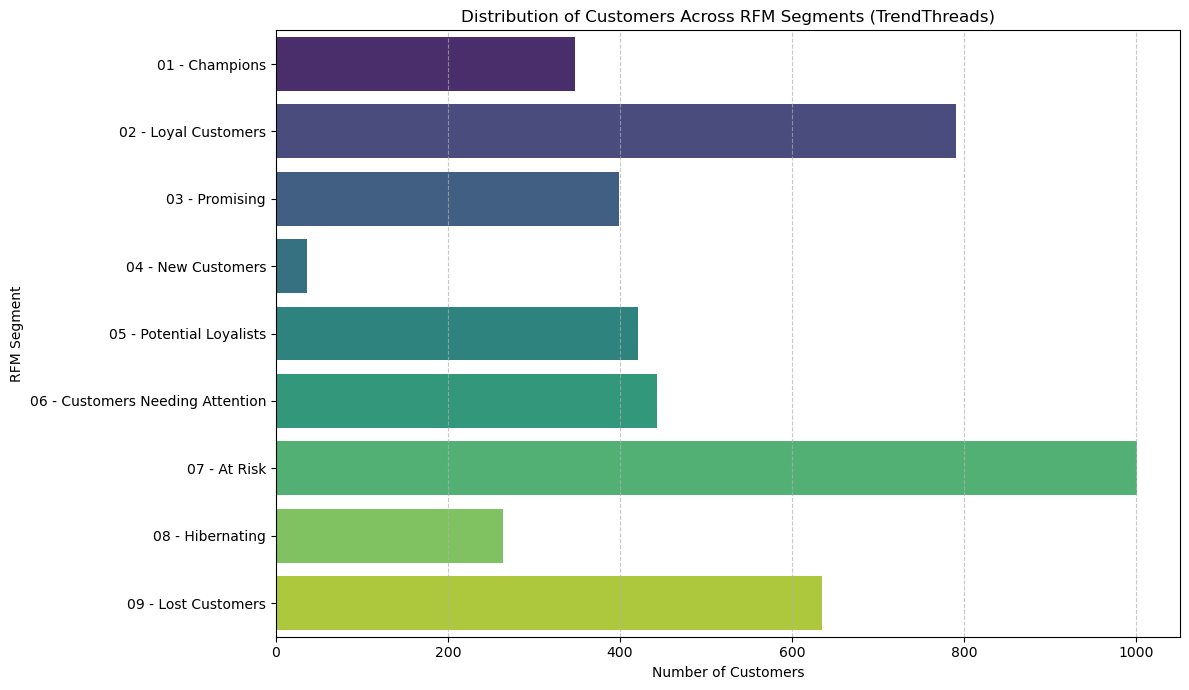

In [40]:
plt.figure(figsize = (12,7))
sns.countplot(data = rfm_df, y = 'RFM_Segment', order = rfm_df['RFM_Segment'].value_counts().sort_index().index, palette='viridis')
plt.title('Distribution of Customers Across RFM Segments (TrendThreads)')
plt.xlabel('Number of Customers')
plt.ylabel('RFM Segment')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [41]:
segment_means_plot = segment_means.reset_index()
print(segment_means_plot)

                        RFM_Segment   R_Score   F_Score   M_Score
0                    01 - Champions  5.000000  5.000000  5.000000
1              02 - Loyal Customers  4.360303  4.428571  4.060683
2                    03 - Promising  4.423559  2.734336  2.942356
3                04 - New Customers  5.000000  1.000000  1.444444
4          05 - Potential Loyalists  3.000000  4.002375  3.992874
5  06 - Customers Needing Attention  1.729120  3.501129  3.873589
6                      07 - At Risk  1.438561  2.016983  2.022977
7                  08 - Hibernating  1.306818  1.000000  1.000000
8               09 - Lost Customers  3.359055  1.771654  1.811024


In [42]:
segment_means_melted = segment_means_plot.melt(id_vars='RFM_Segment', var_name='Metric', value_name='Average_Score')
print(segment_means_melted)

                         RFM_Segment   Metric  Average_Score
0                     01 - Champions  R_Score       5.000000
1               02 - Loyal Customers  R_Score       4.360303
2                     03 - Promising  R_Score       4.423559
3                 04 - New Customers  R_Score       5.000000
4           05 - Potential Loyalists  R_Score       3.000000
5   06 - Customers Needing Attention  R_Score       1.729120
6                       07 - At Risk  R_Score       1.438561
7                   08 - Hibernating  R_Score       1.306818
8                09 - Lost Customers  R_Score       3.359055
9                     01 - Champions  F_Score       5.000000
10              02 - Loyal Customers  F_Score       4.428571
11                    03 - Promising  F_Score       2.734336
12                04 - New Customers  F_Score       1.000000
13          05 - Potential Loyalists  F_Score       4.002375
14  06 - Customers Needing Attention  F_Score       3.501129
15                      

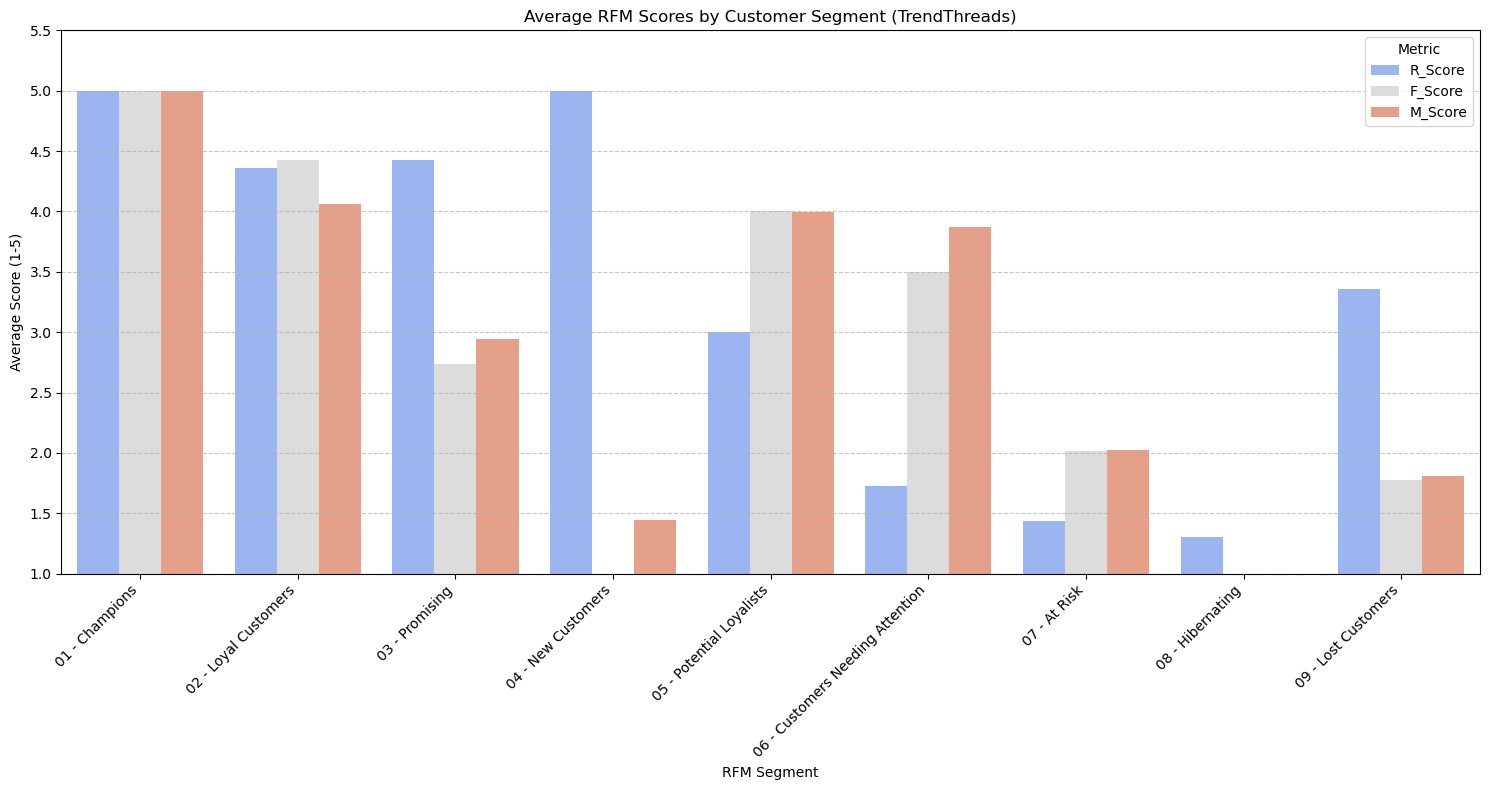

In [43]:
plt.figure(figsize=(15, 8))
sns.barplot(data=segment_means_melted, x='RFM_Segment', y='Average_Score', hue='Metric', palette='coolwarm')
plt.title('Average RFM Scores by Customer Segment (TrendThreads)')
plt.xlabel('RFM Segment')
plt.ylabel('Average Score (1-5)')
plt.xticks(rotation=45, ha='right') 
plt.ylim(1, 5.5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [44]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4338 entries, 0 to 4337
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   CustomerID        4338 non-null   int32         
 1   lastpurchasedate  4338 non-null   datetime64[ns]
 2   frequency         4338 non-null   int64         
 3   monetory          4338 non-null   float64       
 4   recency           4338 non-null   int64         
 5   R_Score_test      4338 non-null   category      
 6   M_Score_test      4338 non-null   category      
 7   R_Score           4338 non-null   int32         
 8   F_Score           4338 non-null   int32         
 9   M_Score           4338 non-null   int32         
 10  RFM_Score         4338 non-null   object        
 11  RFM_Segment       4338 non-null   object        
dtypes: category(2), datetime64[ns](1), float64(1), int32(4), int64(2), object(2)
memory usage: 280.0+ KB


In [45]:
historical_clv_df = rfm_df[['CustomerID', 'monetory']].copy()
historical_clv_df.rename(columns={'monetory': 'HistoricalCLV'}, inplace=True)

print("\nHistorical CLV for each customer (first 10 rows):")
print(historical_clv_df.head(10))


Historical CLV for each customer (first 10 rows):
   CustomerID  HistoricalCLV
0       12346       77183.60
1       12347        4310.00
2       12348        1797.24
3       12349        1757.55
4       12350         334.40
5       12352        2506.04
6       12353          89.00
7       12354        1079.40
8       12355         459.40
9       12356        2811.43


In [46]:
print("\nDescriptive statistics for Historical CLV:")
print(historical_clv_df['HistoricalCLV'].describe())


Descriptive statistics for Historical CLV:
count      4338.000000
mean       2054.266460
std        8989.230441
min           3.750000
25%         307.415000
50%         674.485000
75%        1661.740000
max      280206.020000
Name: HistoricalCLV, dtype: float64


C:\Users\NIKHIL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


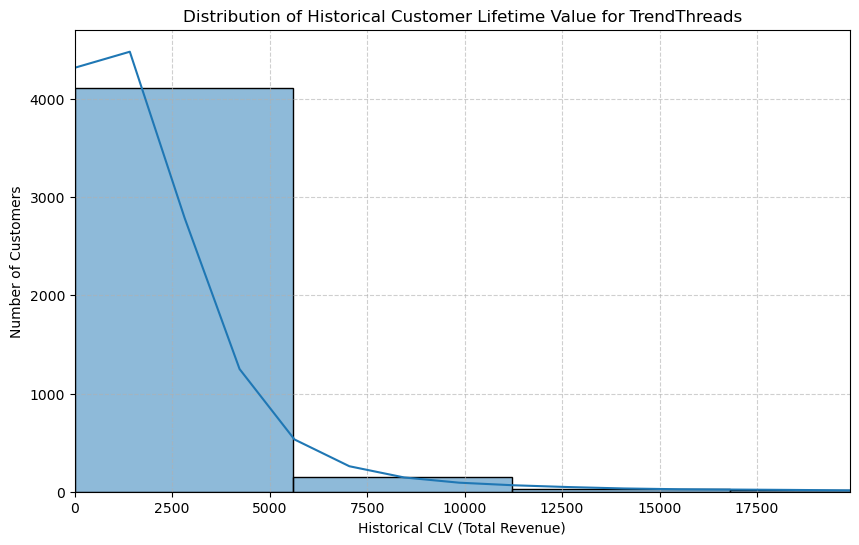

In [47]:
plt.figure(figsize=(10, 6))
sns.histplot(historical_clv_df['HistoricalCLV'], bins=50, kde=True)
plt.title('Distribution of Historical Customer Lifetime Value for TrendThreads')
plt.xlabel('Historical CLV (Total Revenue)')
plt.ylabel('Number of Customers')
plt.xlim(0, historical_clv_df['HistoricalCLV'].quantile(0.99))
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [48]:
print("Date range of df_sales:")
print(f"Minimum InvoiceDate: {df_sales['InvoiceDate'].min()}")
print(f"Maximum InvoiceDate: {df_sales['InvoiceDate'].max()}")

Date range of df_sales:
Minimum InvoiceDate: 2010-12-01 08:26:00
Maximum InvoiceDate: 2011-12-09 12:50:00


In [49]:
split_date = pd.to_datetime('2011-08-31')
print(f"Split Date: {split_date}")

Split Date: 2011-08-31 00:00:00


In [50]:
df_sales_train = df_sales[df_sales['InvoiceDate'] <= split_date]
df_sales_predict = df_sales[df_sales['InvoiceDate'] > split_date]

print("\n Training Period (df_sales_train):")
print(f"Date Range: {df_sales_train['InvoiceDate'].min()} to {df_sales_train['InvoiceDate'].max()}")
print(f"Total Transactions: {len(df_sales_train)}")
print(f"Unique Customers: {df_sales_train['CustomerID'].nunique()}")

print("\n Prediction Period (df_sales_predict):")
print(f"Date Range: {df_sales_predict['InvoiceDate'].min()} to {df_sales_predict['InvoiceDate'].max()}")
print(f"Total Transactions: {len(df_sales_predict)}")
print(f"Unique Customers: {df_sales_predict['CustomerID'].nunique()}")
print(f"Customers in Prediction Period NOT in Training Period: {df_sales_predict[~df_sales_predict['CustomerID'].isin(df_sales_train['CustomerID'])]['CustomerID'].nunique()}")


 Training Period (df_sales_train):
Date Range: 2010-12-01 08:26:00 to 2011-08-30 17:23:00
Total Transactions: 225712
Unique Customers: 3312

 Prediction Period (df_sales_predict):
Date Range: 2011-08-31 08:55:00 to 2011-12-09 12:50:00
Total Transactions: 172172
Unique Customers: 2983
Customers in Prediction Period NOT in Training Period: 1026


In [51]:
snapshot_date_train = df_sales_train['InvoiceDate'].max() + pd.Timedelta(days=1)
print(f"RFM Snapshot Date for Training Period: {snapshot_date_train}")


rfm_df_train = df_sales_train.groupby('CustomerID').agg(Recency=('InvoiceDate', lambda date: (snapshot_date_train - date.max()).days), Frequency=('InvoiceNo', 'nunique'),Monetary=('Revenue', 'sum')).reset_index()
rfm_df_train.rename(columns={'Monetary': 'HistoricalCLV_Train'}, inplace=True)

print("\nRFM features for Training Period (first 10 rows):")
print(rfm_df_train.head(10))

print("\nDescriptive statistics for RFM features in Training Period:")
print(rfm_df_train[['Recency', 'Frequency', 'HistoricalCLV_Train']].describe())

RFM Snapshot Date for Training Period: 2011-08-31 17:23:00

RFM features for Training Period (first 10 rows):
   CustomerID  Recency  Frequency  HistoricalCLV_Train
0       12346      225          1             77183.60
1       12347       29          5              2790.86
2       12348      148          3              1487.24
3       12350      210          1               334.40
4       12352      162          5              1561.81
5       12353      103          1                89.00
6       12354      132          1              1079.40
7       12355      114          1               459.40
8       12356      145          2              2753.08
9       12358       50          1               484.86

Descriptive statistics for RFM features in Training Period:
           Recency    Frequency  HistoricalCLV_Train
count  3312.000000  3312.000000          3312.000000
mean     92.803140     3.433273          1575.694361
std      76.407801     5.574981          5974.882022
min       1.

In [52]:
future_clv_predict = df_sales_predict.groupby('CustomerID')['Revenue'].sum().reset_index()
future_clv_predict.rename(columns={'Revenue': 'Target_Revenue'}, inplace=True)

print("\nFuture Revenue (Target_Revenue) for customers in Prediction Period (first 10 rows):")
print(future_clv_predict.head(10))

print("\nDescriptive statistics for Target_Revenue in Prediction Period:")
print(future_clv_predict['Target_Revenue'].describe())


Future Revenue (Target_Revenue) for customers in Prediction Period (first 10 rows):
   CustomerID  Target_Revenue
0       12347         1519.14
1       12348          310.00
2       12349         1757.55
3       12352          944.23
4       12356           58.35
5       12357         6207.67
6       12358          683.20
7       12359         2876.85
8       12360         1043.78
9       12362         3478.88

Descriptive statistics for Target_Revenue in Prediction Period:
count      2983.000000
mean       1237.917594
std        5457.712663
min           3.350000
25%         262.950000
50%         508.560000
75%        1045.655000
max      168469.600000
Name: Target_Revenue, dtype: float64


In [53]:
clv_model_df = rfm_df_train.merge(future_clv_predict, on='CustomerID', how='left')
clv_model_df['Target_Revenue'].fillna(0, inplace=True)

print("\nMerged CLV Model DataFrame (first 10 rows):")
print(clv_model_df.head(10))

print("\nInformation about the Merged DataFrame:")
clv_model_df.info()

print("\nDescriptive statistics for Merged DataFrame (including Target_Revenue):")
print(clv_model_df.describe())

zero_target_customers = clv_model_df[clv_model_df['Target_Revenue'] == 0].shape[0]
print(f"\nNumber of customers with 0 Target_Revenue (i.e., did not purchase in prediction period): {zero_target_customers}")
print(f"Percentage of customers with 0 Target_Revenue: {(zero_target_customers / len(clv_model_df) * 100):.2f}%")


Merged CLV Model DataFrame (first 10 rows):
   CustomerID  Recency  Frequency  HistoricalCLV_Train  Target_Revenue
0       12346      225          1             77183.60            0.00
1       12347       29          5              2790.86         1519.14
2       12348      148          3              1487.24          310.00
3       12350      210          1               334.40            0.00
4       12352      162          5              1561.81          944.23
5       12353      103          1                89.00            0.00
6       12354      132          1              1079.40            0.00
7       12355      114          1               459.40            0.00
8       12356      145          2              2753.08           58.35
9       12358       50          1               484.86          683.20

Information about the Merged DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 5 columns):
 #   Column               N

<Axes: xlabel='HistoricalCLV_Train', ylabel='Target_Revenue'>

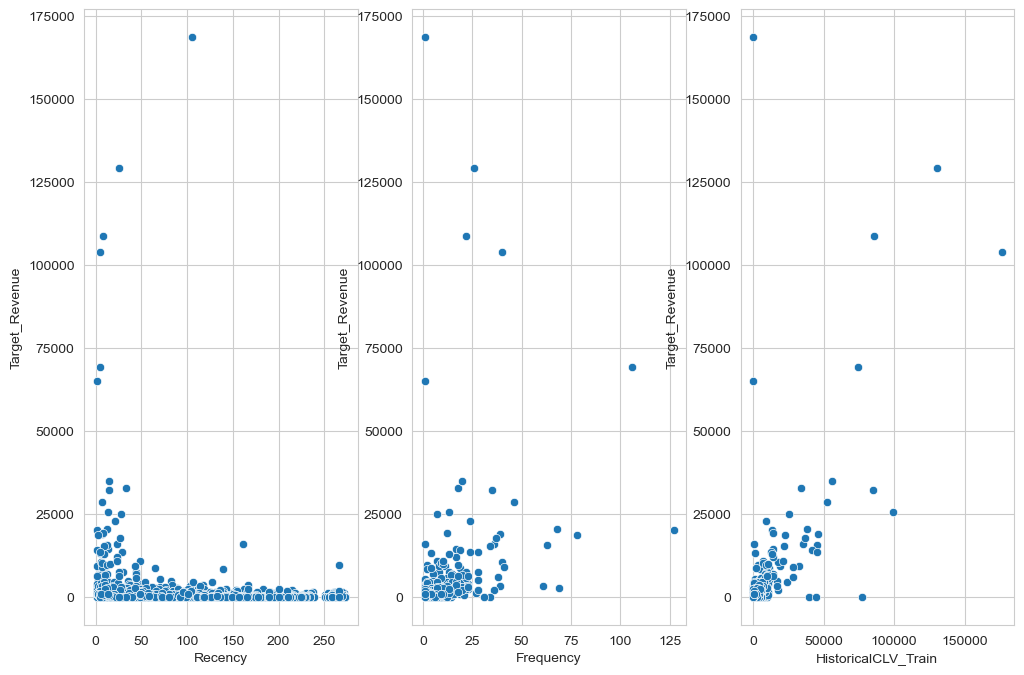

In [87]:
fig = plt.figure(figsize = (12,8))

plt.subplot(1,3,1)
sns.scatterplot(data =clv_model_df, x = 'Recency', y = 'Target_Revenue')
plt.subplot(1,3,2)
sns.scatterplot(data =clv_model_df, x = 'Frequency', y = 'Target_Revenue')
plt.subplot(1,3,3)
sns.scatterplot(data =clv_model_df, x = 'HistoricalCLV_Train', y = 'Target_Revenue')

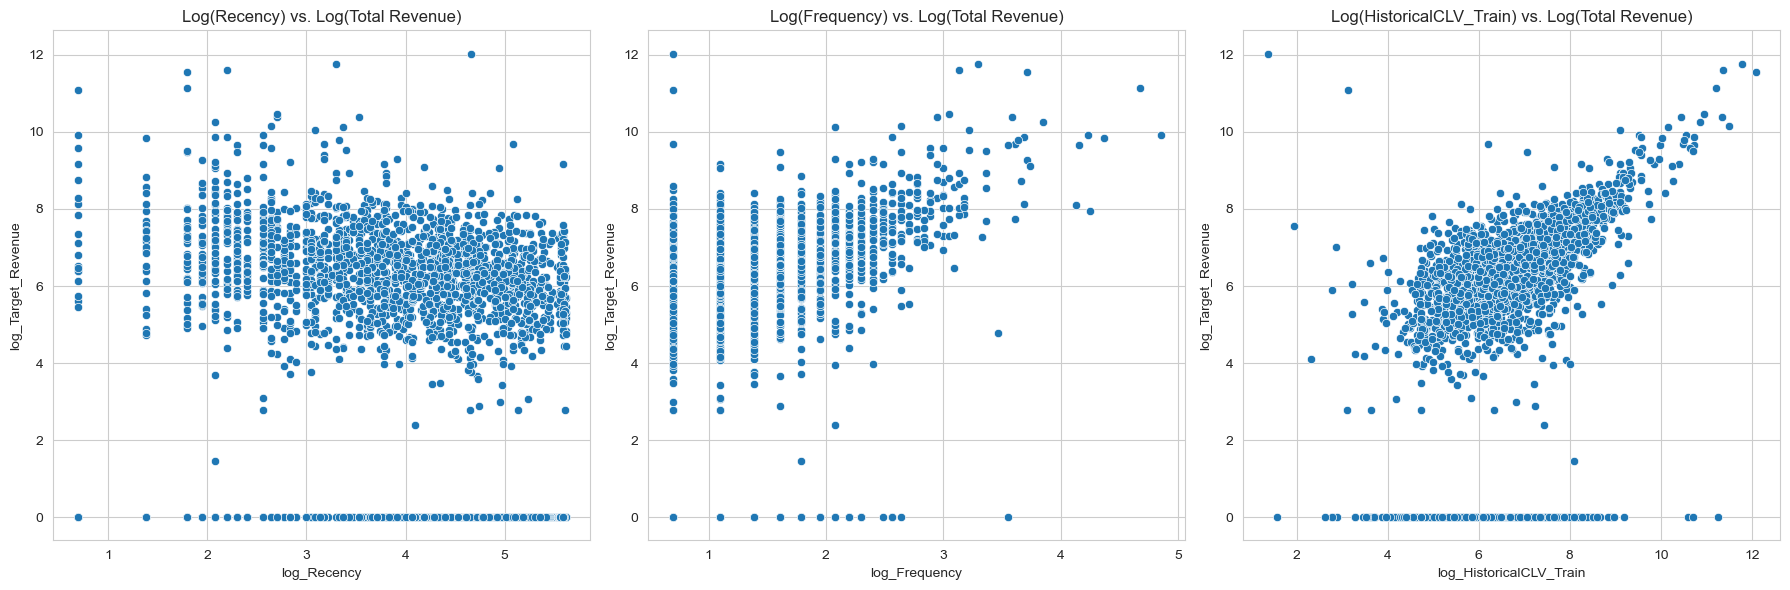

In [89]:
import numpy as np # Make sure numpy is imported
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming clv_model_df is your DataFrame with original columns

# 1. Apply Transformations
clv_model_df['log_Target_Revenue'] = np.log1p(clv_model_df['Target_Revenue'])
clv_model_df['log_Recency'] = np.log1p(clv_model_df['Recency']) # Optional, check if Recency is skewed
clv_model_df['log_Frequency'] = np.log1p(clv_model_df['Frequency'])
clv_model_df['log_HistoricalCLV_Train'] = np.log1p(clv_model_df['HistoricalCLV_Train'])


# 2. Re-create Scatter Plots with Transformed Data
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.scatterplot(data=clv_model_df, x='log_Recency', y='log_Target_Revenue', ax=axes[0])
axes[0].set_title('Log(Recency) vs. Log(Total Revenue)')

sns.scatterplot(data=clv_model_df, x='log_Frequency', y='log_Target_Revenue', ax=axes[1])
axes[1].set_title('Log(Frequency) vs. Log(Total Revenue)')

sns.scatterplot(data=clv_model_df, x='log_HistoricalCLV_Train', y='log_Target_Revenue', ax=axes[2])
axes[2].set_title('Log(HistoricalCLV_Train) vs. Log(Total Revenue)')

plt.tight_layout()
plt.show()

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import numpy as np


In [106]:
clv_model_df.drop(columns = {'Is_Purchaser','Predicted_Is_Purchaser','Predicted_Revenue_If_Purchaser','Combined_Predicted_CLV'},inplace = True)

In [107]:
clv_model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustomerID               3312 non-null   int32  
 1   Recency                  3312 non-null   int64  
 2   Frequency                3312 non-null   int64  
 3   HistoricalCLV_Train      3312 non-null   float64
 4   Target_Revenue           3312 non-null   float64
 5   log_Target_Revenue       3312 non-null   float64
 6   log_Recency              3312 non-null   float64
 7   log_Frequency            3312 non-null   float64
 8   log_HistoricalCLV_Train  3312 non-null   float64
dtypes: float64(6), int32(1), int64(2)
memory usage: 220.1 KB


In [108]:
clv_model_df['Is_Purchaser'] = (clv_model_df['log_Target_Revenue'] > 0).astype(int)
print("\nDistribution of 'Is_Purchaser' (Our new target variable):")
print(clv_model_df['Is_Purchaser'].value_counts())
print(f"Percentage of purchasers: {(clv_model_df['Is_Purchaser'].value_counts()[1] / len(clv_model_df) * 100):.2f}%")
print(f"Percentage of non-purchasers: {(clv_model_df['Is_Purchaser'].value_counts()[0] / len(clv_model_df) * 100):.2f}%") 


Distribution of 'Is_Purchaser' (Our new target variable):
Is_Purchaser
1    1957
0    1355
Name: count, dtype: int64
Percentage of purchasers: 59.09%
Percentage of non-purchasers: 40.91%


In [135]:
clv_model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustomerID               3312 non-null   int32  
 1   Recency                  3312 non-null   int64  
 2   Frequency                3312 non-null   int64  
 3   HistoricalCLV_Train      3312 non-null   float64
 4   Target_Revenue           3312 non-null   float64
 5   log_Target_Revenue       3312 non-null   float64
 6   log_Recency              3312 non-null   float64
 7   log_Frequency            3312 non-null   float64
 8   log_HistoricalCLV_Train  3312 non-null   float64
 9   Is_Purchaser             3312 non-null   int32  
dtypes: float64(6), int32(2), int64(2)
memory usage: 233.0 KB


In [144]:
features = ['log_Recency', 'log_Frequency', 'log_HistoricalCLV_Train']
X = clv_model_df[features] 

In [174]:
X_train, X_test, \
y_is_purchaser_train, y_is_purchaser_test, \
y_log_total_revenue_train, y_log_total_revenue_test, \
y_total_revenue_train, y_total_revenue_test = train_test_split(
    X,
    clv_model_df['Is_Purchaser'],
    clv_model_df['log_Target_Revenue'],
    clv_model_df['Target_Revenue'],
    test_size=0.2,
    random_state=42,
    stratify=clv_model_df['Is_Purchaser']
)
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_is_purchaser_train shape: {y_is_purchaser_train.shape}, y_is_purchaser_test shape: {y_is_purchaser_test.shape}")

X_train shape: (2649, 3), X_test shape: (663, 3)
y_is_purchaser_train shape: (2649,), y_is_purchaser_test shape: (663,)


In [175]:
classifier_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced_subsample',n_jobs = -1)
print(f"Training the {type(classifier_model).__name__} model...")
classifier_model.fit(X_train, y_is_purchaser_train)
print("Training complete.")

Training the RandomForestClassifier model...
Training complete.


In [176]:
y_pred_classes = classifier_model.predict(X_test)
y_pred_proba = classifier_model.predict_proba(X_test)[:, 1]

In [177]:
print("--- Classifier Model Evaluation ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_classes):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_classes):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_classes):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_classes):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")

--- Classifier Model Evaluation ---
Accuracy: 0.6229
Precision: 0.6784
Recall: 0.6888
F1-Score: 0.6835
ROC AUC Score: 0.6806


In [178]:
cm = confusion_matrix(y_test, y_pred_classes)
print("\nConfusion Matrix:")
print(cm)


Confusion Matrix:
[[143 128]
 [122 270]]


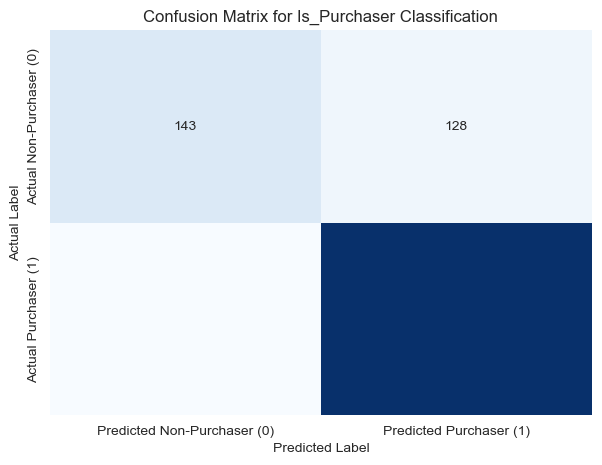

In [179]:
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Non-Purchaser (0)', 'Predicted Purchaser (1)'],
            yticklabels=['Actual Non-Purchaser (0)', 'Actual Purchaser (1)'])
plt.title('Confusion Matrix for Is_Purchaser Classification')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [180]:
mask_actual_purchasers_in_train = (y_is_purchaser_train == 1)
X_train_purchasers = X_train[mask_actual_purchasers_in_train]
y_log_revenue_train_purchasers = y_log_total_revenue_train[mask_actual_purchasers_in_train]

In [181]:
regressor_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
print(f"Regression model chosen: {type(regressor_model).__name__}")
regressor_model.fit(X_train_purchasers, y_log_revenue_train_purchasers)
print("Training complete.")

Regression model chosen: RandomForestRegressor
Training complete.


In [182]:
mask_actual_purchasers_in_test = (y_is_purchaser_test == 1)
X_test_actual_purchasers = X_test[mask_actual_purchasers_in_test]
y_log_revenue_test_actual_purchasers = y_log_total_revenue_test[mask_actual_purchasers_in_test]
y_total_revenue_test_actual_purchasers = y_total_revenue_test[mask_actual_purchasers_in_test]

In [183]:
print(f"Number of actual purchasers in test set: {len(X_test_actual_purchasers)}")

if len(X_test_actual_purchasers) == 0:
    print("No actual purchasers found in the test set. Cannot evaluate regression model.")
else:
    predicted_log_revenue_for_actual_purchasers = regressor_model.predict(X_test_actual_purchasers)
    predicted_revenue_for_actual_purchasers = np.expm1(predicted_log_revenue_for_actual_purchasers)
    
    rmse_reg = np.sqrt(mean_squared_error(y_total_revenue_test_actual_purchasers, predicted_revenue_for_actual_purchasers))
    mae_reg = mean_absolute_error(y_total_revenue_test_actual_purchasers, predicted_revenue_for_actual_purchasers)
    r2_reg = r2_score(y_total_revenue_test_actual_purchasers, predicted_revenue_for_actual_purchasers)

Number of actual purchasers in test set: 392


In [184]:
print(f"Regressor Model RMSE (on actual purchasers): {rmse_reg:.2f}")
print(f"Regressor Model MAE (on actual purchasers): {mae_reg:.2f}")
print(f"Regressor Model R-squared (on actual purchasers): {r2_reg:.2f}")

Regressor Model RMSE (on actual purchasers): 9607.19
Regressor Model MAE (on actual purchasers): 1310.13
Regressor Model R-squared (on actual purchasers): 0.23


In [185]:
mask_predicted_purchasers = (y_pred_classes == 1)
X_test_predicted_purchasers = X_test[mask_predicted_purchasers]

In [186]:
final_clv_predictions = np.zeros(len(y_pred_classes))
if X_test_predicted_purchasers.shape[0] > 0: # Check if there are any predicted purchasers
    predicted_log_revenue_for_predicted_purchasers = regressor_model.predict(X_test_predicted_purchasers)
    predicted_revenue_for_predicted_purchasers = np.expm1(predicted_log_revenue_for_predicted_purchasers)
    final_clv_predictions[mask_predicted_purchasers] = predicted_revenue_for_predicted_purchasers
else:
    print("No customers were predicted as purchasers by the classifier. All CLV predictions will be 0.")

In [187]:
print("\n--- Overall CLV Model Evaluation on Test Set ---")
print(f"Total Actual Revenue (Test Set): ${y_total_revenue_test.sum():,.2f}")
print(f"Total Predicted Revenue (Test Set): ${final_clv_predictions.sum():,.2f}")
print("\n")


--- Overall CLV Model Evaluation on Test Set ---
Total Actual Revenue (Test Set): $841,682.84
Total Predicted Revenue (Test Set): $511,761.71




In [188]:
mae_overall = mean_absolute_error(y_total_revenue_test, final_clv_predictions)
print(f"Overall MAE: ${mae_overall:,.2f}")

# Root Mean Squared Error (RMSE) for overall CLV
rmse_overall = np.sqrt(mean_squared_error(y_total_revenue_test, final_clv_predictions))
print(f"Overall RMSE: ${rmse_overall:,.2f}")

# R-squared (R2 Score) for overall CLV
r2_overall = r2_score(y_total_revenue_test, final_clv_predictions)
print(f"Overall R-squared: {r2_overall:.4f}")

Overall MAE: $927.46
Overall RMSE: $7,431.18
Overall R-squared: 0.2318


In [189]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  int32         
 7   Country      397884 non-null  object        
 8   Revenue      397884 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(4)
memory usage: 28.8+ MB


In [230]:
new_features_df = df_sales_train.copy()
new_features = new_features_df.groupby('CustomerID').agg(
    Total_Revenue_AOV=('Revenue', 'sum'), 
    Num_Invoices_AOV=('InvoiceNo', 'nunique'),
    First_Purchase_Date=('InvoiceDate', 'min'),
    Number_of_Unique_Products=('StockCode', 'nunique')).reset_index()

In [231]:
new_features['Average_order_value'] =np.where(new_features['Num_Invoices_AOV'] > 0, new_features['Total_Revenue_AOV'] / new_features['Num_Invoices_AOV'],0)
new_features['Activity_Duration_Days'] = (split_date - new_features['First_Purchase_Date']).dt.days

In [232]:
new_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   CustomerID                 3312 non-null   int32         
 1   Total_Revenue_AOV          3312 non-null   float64       
 2   Num_Invoices_AOV           3312 non-null   int64         
 3   First_Purchase_Date        3312 non-null   datetime64[ns]
 4   Number_of_Unique_Products  3312 non-null   int64         
 5   Average_order_value        3312 non-null   float64       
 6   Activity_Duration_Days     3312 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(3)
memory usage: 168.3 KB


In [233]:
new_features_to_merge = new_features[[
    'CustomerID',
    'Average_order_value',
    'Activity_Duration_Days',
    'Number_of_Unique_Products'
]]
clv_model_df = pd.merge(clv_model_df, new_features_to_merge, on='CustomerID', how='left')

In [234]:
clv_model_df.isnull().sum()

CustomerID                   0
Recency                      0
Frequency                    0
HistoricalCLV_Train          0
Target_Revenue               0
log_Target_Revenue           0
log_Recency                  0
log_Frequency                0
log_HistoricalCLV_Train      0
Is_Purchaser                 0
Average_order_value          0
Activity_Duration_Days       0
Number_of_Unique_Products    0
dtype: int64

<Axes: xlabel='Number_of_Unique_Products', ylabel='Target_Revenue'>

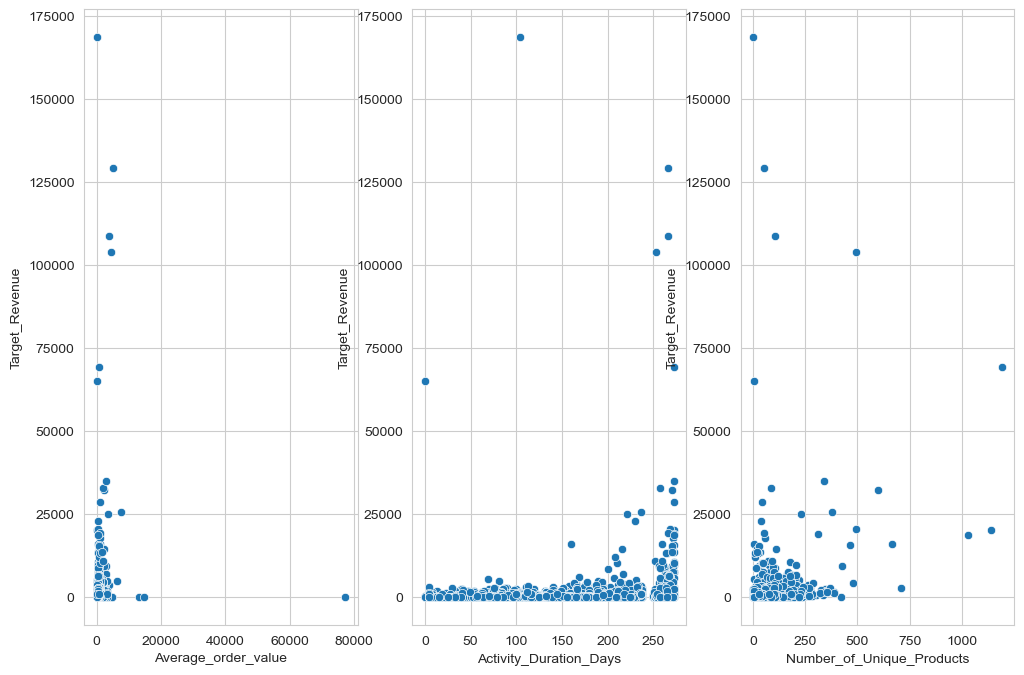

In [235]:
fig = plt.figure(figsize = (12,8))

plt.subplot(1,3,1)
sns.scatterplot(data =clv_model_df, x = 'Average_order_value', y = 'Target_Revenue')
plt.subplot(1,3,2)
sns.scatterplot(data =clv_model_df, x = 'Activity_Duration_Days', y = 'Target_Revenue')
plt.subplot(1,3,3)
sns.scatterplot(data =clv_model_df, x = 'Number_of_Unique_Products', y = 'Target_Revenue')

In [236]:
new_features['Activity_Duration_Days'].value_counts().reset_index()

,Activity_Duration_Days,count
0,272,95
1,271,93
2,265,83
3,267,70
4,268,69
...,...,...
213,16,3
214,18,3
215,7,3
216,51,2


In [238]:
clv_model_df['log_Average_order_value'] = np.log1p(clv_model_df['Average_order_value'])
clv_model_df['log_Activity_Duration_Days'] = np.log1p(clv_model_df['Activity_Duration_Days'])
clv_model_df['log_Number_of_Unique_Products'] = np.log1p(clv_model_df['Number_of_Unique_Products'])

<Axes: xlabel='log_Number_of_Unique_Products', ylabel='log_Target_Revenue'>

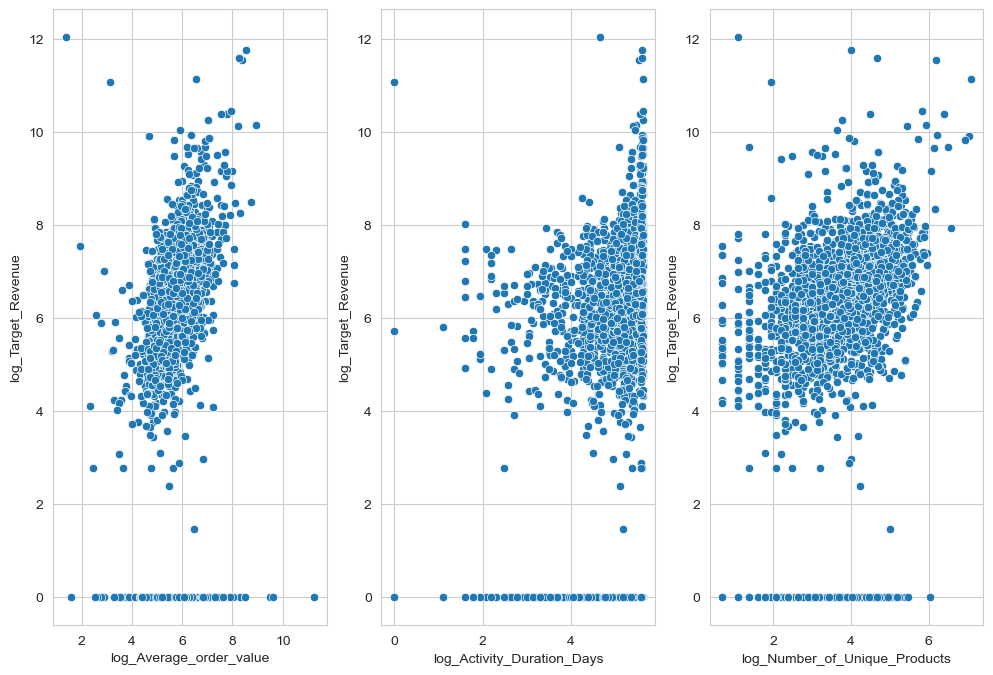

In [239]:
fig = plt.figure(figsize = (12,8))

plt.subplot(1,3,1)
sns.scatterplot(data =clv_model_df, x = 'log_Average_order_value', y = 'log_Target_Revenue')
plt.subplot(1,3,2)
sns.scatterplot(data =clv_model_df, x = 'log_Activity_Duration_Days', y = 'log_Target_Revenue')
plt.subplot(1,3,3)
sns.scatterplot(data =clv_model_df, x = 'log_Number_of_Unique_Products', y = 'log_Target_Revenue')

In [246]:
clv_model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CustomerID                     3312 non-null   int32  
 1   Recency                        3312 non-null   int64  
 2   Frequency                      3312 non-null   int64  
 3   HistoricalCLV_Train            3312 non-null   float64
 4   Target_Revenue                 3312 non-null   float64
 5   log_Target_Revenue             3312 non-null   float64
 6   log_Recency                    3312 non-null   float64
 7   log_Frequency                  3312 non-null   float64
 8   log_HistoricalCLV_Train        3312 non-null   float64
 9   Is_Purchaser                   3312 non-null   int32  
 10  Average_order_value            3312 non-null   float64
 11  Activity_Duration_Days         3312 non-null   int64  
 12  Number_of_Unique_Products      3312 non-null   i

In [247]:
clv_model_df['Is_Purchaser'] = (clv_model_df['Target_Revenue'] > 0).astype(int)
print(clv_model_df['Is_Purchaser'].value_counts())

Is_Purchaser
1    1957
0    1355
Name: count, dtype: int64


In [251]:
features = [
    'log_Recency',
    'log_Frequency',
    'log_HistoricalCLV_Train',
    'log_Average_order_value',
    'log_Activity_Duration_Days',
    'log_Number_of_Unique_Products'
]

X = clv_model_df[features]
y_classifier = clv_model_df['Is_Purchaser']
y_regressor = clv_model_df['log_Target_Revenue'] # This will be used after filtering

In [252]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_classifier_train, y_classifier_test, y_regressor_train, y_regressor_test = \
    train_test_split(X, y_classifier, y_regressor, test_size=0.2, random_state=42, stratify=y_classifier) # Stratify for balanced classes

In [262]:
classifier = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced') # Use class_weight for imbalanced data
classifier.fit(X_train, y_classifier_train)

y_classifier_pred = classifier.predict(X_test)
y_classifier_pred_proba = classifier.predict_proba(X_test)[:, 1]

print("Classifier Performance:")
print(f"Accuracy: {accuracy_score(y_classifier_test, y_classifier_pred):.4f}")
print(f"Precision: {precision_score(y_classifier_test, y_classifier_pred):.4f}")
print(f"Recall: {recall_score(y_classifier_test, y_classifier_pred):.4f}")
print(f"F1-Score: {f1_score(y_classifier_test, y_classifier_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_classifier_test, y_classifier_pred_proba):.4f}")

Classifier Performance:
Accuracy: 0.6214
Precision: 0.6707
Recall: 0.7066
F1-Score: 0.6882
ROC AUC: 0.6905


In [258]:
X_train_purchasers = X_train[y_regressor_train > 0]
y_regressor_train_purchasers = y_regressor_train[y_regressor_train > 0]
X_test_purchasers = X_test[y_regressor_test > 0]
y_regressor_test_purchasers = y_regressor_test[y_regressor_test > 0]

regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train_purchasers, y_regressor_train_purchasers)

y_regressor_pred_log = regressor.predict(X_test_purchasers)

# Inverse transform predictions for evaluation
y_regressor_pred_original_scale = np.expm1(y_regressor_pred_log)
y_regressor_test_original_scale = np.expm1(y_regressor_test_purchasers)
print("\nRegressor Performance (on actual purchasers):")
print(f"MAE: {mean_absolute_error(y_regressor_test_original_scale, y_regressor_pred_original_scale):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_regressor_test_original_scale, y_regressor_pred_original_scale)):.2f}")
print(f"R-squared: {r2_score(y_regressor_test_original_scale, y_regressor_pred_original_scale):.2f}")
 
    
importances = regressor.feature_importances_    
feature_importances_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

# Sort features by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

print("Feature Importances from Regressor:")
print(feature_importances_df)


Regressor Performance (on actual purchasers):
MAE: 1304.43
RMSE: 9638.37
R-squared: 0.22
Feature Importances from Regressor:
                         Feature  Importance
2        log_HistoricalCLV_Train    0.546421
3        log_Average_order_value    0.165437
4     log_Activity_Duration_Days    0.094480
5  log_Number_of_Unique_Products    0.090502
0                    log_Recency    0.086700
1                  log_Frequency    0.016460


In [263]:
# Predict purchaser status for the entire test set
y_classifier_pred_test = classifier.predict(X_test)

# Make regressor predictions only for those predicted as purchasers
# Use the original scale of X_test for this
X_test_predicted_purchasers = X_test[y_classifier_pred_test == 1]

# Ensure y_regressor_pred_original_scale has correct shape/indices for merging
# You need to predict on X_test_predicted_purchasers and then inverse transform those
if not X_test_predicted_purchasers.empty:
    predicted_revenue_for_purchasers_log = regressor.predict(X_test_predicted_purchasers)
    predicted_revenue_for_purchasers_original = np.expm1(predicted_revenue_for_purchasers_log)
else:
    predicted_revenue_for_purchasers_original = np.array([])


# Create a full prediction array for the entire test set
overall_predicted_clv = np.zeros(len(X_test))

# Map predictions back to original test set indices
if not X_test_predicted_purchasers.empty:
    # Get original indices of predicted purchasers in the test set
    test_indices = X_test.index
    predicted_purchaser_indices = X_test_predicted_purchasers.index

    # Create a mapping from predicted_purchaser_indices to their position in X_test's original indices
    map_to_overall_test_indices = [test_indices.get_loc(idx) for idx in predicted_purchaser_indices]

    overall_predicted_clv[map_to_overall_test_indices] = predicted_revenue_for_purchasers_original

# Calculate actual target revenue for the whole test set (original scale)
actual_target_revenue_test = np.expm1(y_regressor_test) # Inverse transform the actual log_Target_Revenue

print("\nOverall CLV Model Performance (on entire test set):")
print(f"Overall MAE: {mean_absolute_error(actual_target_revenue_test, overall_predicted_clv):.2f}")
print(f"Overall RMSE: {np.sqrt(mean_squared_error(actual_target_revenue_test, overall_predicted_clv)):.2f}")
print(f"Overall R-squared: {r2_score(actual_target_revenue_test, overall_predicted_clv):.4f}")

# You can also compare total actual vs total predicted revenue
print(f"Total Actual Revenue (Test Set): {actual_target_revenue_test.sum():,.2f}")
print(f"Total Predicted Revenue (Test Set): {overall_predicted_clv.sum():,.2f}")


Overall CLV Model Performance (on entire test set):
Overall MAE: 930.99
Overall RMSE: 7423.48
Overall R-squared: 0.2333
Total Actual Revenue (Test Set): 841,682.84
Total Predicted Revenue (Test Set): 489,913.88


In [261]:
cm1= confusion_matrix(y_classifier_test, y_classifier_pred)
print("\nConfusion Matrix:")
print(cm1)


Confusion Matrix:
[[135 136]
 [115 277]]


In [265]:
pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/29/22/e3ff2dfafe862a91733dfa0aecdb4794aa1d9a18e09a14e118bde0cbc2db/xgboost-3.0.2-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB 262.6 kB/s eta 0:09:32
   ---------------------------------------- 0.0/150.0 MB 217.9 kB/s eta 0:11:29
   ---------------------------------------- 0.1/150.0 MB 297.7 kB/s eta 0:08:24
   ---------------------------------------- 0.1/150.0 MB 297.7 kB/s eta 0:08:24
   ---------------------------------------- 0.1/150.0 MB 286.7 kB/s eta 0:08:43
   ---------------------------------------- 0.1/150.0 MB 291.5 kB/s eta 0:08:35
   ----------------------------

In [274]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    mean_absolute_error, mean_squared_error, r2_score
)
import xgboost as xgb # Import XGBoost

# --- Assuming clv_model_df is already prepared as discussed ---
# (Your clv_model_df definition should be here if not already in your environment)
# For demonstration, let's create a dummy clv_model_df if you don't have it initialized here
# In your actual code, this would come from your data preparation steps.
# Example dummy data (replace with your actual clv_model_df):
try:
    clv_model_df # Check if it's already defined
except NameError:
    np.random.seed(42)
    n_samples = 3000
    clv_model_df = pd.DataFrame({
        'log_Recency': np.random.rand(n_samples) * 5,
        'log_Frequency': np.random.rand(n_samples) * 3,
        'log_HistoricalCLV_Train': np.random.rand(n_samples) * 10,
        'Is_Purchaser': np.random.randint(0, 2, n_samples),
        'log_Target_Revenue': np.random.rand(n_samples) * 7,
        'Target_Revenue': np.random.rand(n_samples) * 1000,
        'log_Average_order_value': np.random.rand(n_samples) * 4,
        'log_Activity_Duration_Days': np.random.rand(n_samples) * 6,
        'log_Number_of_Unique_Products': np.random.rand(n_samples) * 2
    })
    # Ensure Target_Revenue and log_Target_Revenue are 0 where Is_Purchaser is 0
    clv_model_df.loc[clv_model_df['Is_Purchaser'] == 0, ['log_Target_Revenue', 'Target_Revenue']] = 0
    # Ensure log_Average_order_value is not infinite if Frequency is 0, handle division by zero
    clv_model_df.loc[clv_model_df['log_Frequency'] == 0, 'log_Average_order_value'] = 0


# --- Data Splitting ---
features = [
    'log_Recency',
    'log_Frequency',
    'log_HistoricalCLV_Train',
    'log_Average_order_value',
    'log_Activity_Duration_Days',
    'log_Number_of_Unique_Products'
]

X = clv_model_df[features]
y_classifier = clv_model_df['Is_Purchaser']
y_regressor = clv_model_df['log_Target_Revenue']

X_train, X_test, y_classifier_train, y_classifier_test, y_regressor_train, y_regressor_test = \
    train_test_split(X, y_classifier, y_regressor, test_size=0.2, random_state=42, stratify=y_classifier)

print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")


# --- Part 1: Classifier Model ---
print("\n--- Training Classifier Model (RandomForest) ---")
classifier = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', n_jobs=-1)
classifier.fit(X_train, y_classifier_train)

y_classifier_pred = classifier.predict(X_test)
y_classifier_pred_proba = classifier.predict_proba(X_test)[:, 1]

print("Classifier Performance:")
print(f"Accuracy: {accuracy_score(y_classifier_test, y_classifier_pred):.4f}")
print(f"Precision: {precision_score(y_classifier_test, y_classifier_pred):.4f}")
print(f"Recall: {recall_score(y_classifier_test, y_classifier_pred):.4f}")
print(f"F1-Score: {f1_score(y_classifier_test, y_classifier_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_classifier_test, y_classifier_pred_proba):.4f}")


# --- Prepare Data for Regressor (Actual Purchasers) ---
mask_actual_purchasers_train = (y_regressor_train > 0)
X_train_purchasers = X_train[mask_actual_purchasers_train]
y_regressor_train_purchasers = y_regressor_train[mask_actual_purchasers_train]

mask_actual_purchasers_test = (y_regressor_test > 0)
X_test_purchasers = X_test[mask_actual_purchasers_test]
y_regressor_test_purchasers = y_regressor_test[mask_actual_purchasers_test] # Log-transformed actual revenue for purchasers

# Get original scale for evaluation of regressor
actual_revenue_test_purchasers_original_scale = np.expm1(y_regressor_test_purchasers)


# --- Part 2: Regressor Model (XGBoost) ---
print("\n--- Training Regressor Model (XGBoost) ---")

# Initialize the XGBoost Regressor model
# Common starting hyperparameters. You'll tune these later.
xgboost_regressor = xgb.XGBRegressor(
    n_estimators=100,      # Number of boosting rounds (trees)
    learning_rate=0.1,     # Step size shrinkage to prevent overfitting
    max_depth=5,           # Maximum depth of a tree
    random_state=42,       # Ensures reproducibility of results
    n_jobs=-1,             # Use all available CPU cores for faster training
    tree_method='hist',    # Use histogram-based algorithm for faster training on large datasets
    enable_categorical=True # Enable native handling of categorical features if present (XGBoost >= 1.6)
)

xgboost_regressor.fit(X_train_purchasers, y_regressor_train_purchasers)
print("XGBoost Regressor training complete! 🎉")

# Make predictions using the XGBoost Regressor
y_regressor_pred_log = xgboost_regressor.predict(X_test_purchasers)

# Inverse transform predictions for evaluation
y_regressor_pred_original_scale = np.expm1(y_regressor_pred_log)

# Ensure no negative predictions (revenue cannot be negative)
y_regressor_pred_original_scale[y_regressor_pred_original_scale < 0] = 0

print("\nRegressor Performance (XGBoost on actual purchasers):")
print(f"MAE: {mean_absolute_error(actual_revenue_test_purchasers_original_scale, y_regressor_pred_original_scale):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(actual_revenue_test_purchasers_original_scale, y_regressor_pred_original_scale)):.2f}")
print(f"R-squared: {r2_score(actual_revenue_test_purchasers_original_scale, y_regressor_pred_original_scale):.4f}") # Changed to .4f for more precision


# --- Feature Importances from XGBoost Regressor ---
# XGBoost provides feature importances as well
importances = xgboost_regressor.feature_importances_
feature_importances_df = pd.DataFrame({
    'Feature': features, # Use the original 'features' list as it matches X_train_purchasers columns
    'Importance': importances
})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)
print("\nFeature Importances from XGBoost Regressor:")
print(feature_importances_df)


# --- Combining Classifier and Regressor Predictions for Overall CLV ---
print("\n--- Combining Classifier and XGBoost Regressor Predictions ---")

y_classifier_pred_test = classifier.predict(X_test) # Get classifier predictions for the whole test set

# Make regressor predictions only for those predicted as purchasers
X_test_predicted_purchasers = X_test[y_classifier_pred_test == 1]

overall_predicted_clv = np.zeros(len(X_test)) # Initialize with zeros for non-purchasers

if not X_test_predicted_purchasers.empty:
    predicted_revenue_for_purchasers_log = xgboost_regressor.predict(X_test_predicted_purchasers)
    predicted_revenue_for_purchasers_original = np.expm1(predicted_revenue_for_purchasers_log)
    predicted_revenue_for_purchasers_original[predicted_revenue_for_purchasers_original < 0] = 0 # Floor at 0

    # Map predictions back to original test set indices
    # This logic correctly places the regressor's predictions into the overall array
    overall_predicted_clv[y_classifier_pred_test == 1] = predicted_revenue_for_purchasers_original
else:
    print("No customers were predicted as purchasers by the classifier. Overall CLV predictions will be 0.")


# --- Overall CLV Model Evaluation on Entire Test Set ---
print("\n--- Overall CLV Model Performance (on entire test set with XGBoost) ---")

# Calculate actual target revenue for the whole test set (original scale)
actual_target_revenue_test = np.expm1(y_regressor_test) # Inverse transform the actual log_Target_Revenue

print(f"Overall MAE: {mean_absolute_error(actual_target_revenue_test, overall_predicted_clv):.2f}")
print(f"Overall RMSE: {np.sqrt(mean_squared_error(actual_target_revenue_test, overall_predicted_clv)):.2f}")
print(f"Overall R-squared: {r2_score(actual_target_revenue_test, overall_predicted_clv):.4f}")

# Compare total actual vs total predicted revenue
print(f"Total Actual Revenue (Test Set): ${actual_target_revenue_test.sum():,.2f}")
print(f"Total Predicted Revenue (Test Set): ${overall_predicted_clv.sum():,.2f}")


X_train shape: (2649, 6), X_test shape: (663, 6)

--- Training Classifier Model (RandomForest) ---
Classifier Performance:
Accuracy: 0.6214
Precision: 0.6707
Recall: 0.7066
F1-Score: 0.6882
ROC AUC: 0.6905

--- Training Regressor Model (XGBoost) ---
XGBoost Regressor training complete! 🎉

Regressor Performance (XGBoost on actual purchasers):
MAE: 1283.93
RMSE: 9303.39
R-squared: 0.2769

Feature Importances from XGBoost Regressor:
                         Feature  Importance
2        log_HistoricalCLV_Train    0.566093
3        log_Average_order_value    0.168747
4     log_Activity_Duration_Days    0.091326
5  log_Number_of_Unique_Products    0.067830
0                    log_Recency    0.067659
1                  log_Frequency    0.038345

--- Combining Classifier and XGBoost Regressor Predictions ---

--- Overall CLV Model Performance (on entire test set with XGBoost) ---
Overall MAE: 916.40
Overall RMSE: 7167.10
Overall R-squared: 0.2854
Total Actual Revenue (Test Set): $841,682.84
T